# Title: Heart Diseade Pridiction

`Author:`Dr. Muhammad Rameez

`Date:` 2024-09-17

`Dataset:`[Heart Diseade UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

# Meta Data Heart Disease Dataset

## Context
This dataset is multivariate, meaning it provides or involves a variety of separate mathematical or statistical variables for numerical data analysis. It consists of 14 key attributes, including age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, and more. While the full database contains 76 attributes, all published studies to date have focused on a subset of 14 of these.

The Cleveland database is the only one used by ML researchers so far. The primary task associated with this dataset is to predict whether a patient has heart disease based on the given attributes. Additionally, researchers may use the dataset to diagnose and uncover insights that could aid in understanding heart disease.

## Column Descriptions:
- **id**: Unique identifier for each patient.
- **age**: Age of the patient in years.
- **origin**: Place of study.
- **sex**: Male/Female.
- **cp**: Chest pain type (`[typical angina, atypical angina, non-anginal, asymptomatic]`).
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital).
- **chol**: Serum cholesterol in mg/dl.
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **restecg**: Resting electrocardiographic results (`[normal, st-t abnormality, lv hypertrophy]`).
- **thalach**: Maximum heart rate achieved.
- **exang**: Exercise-induced angina (1 = true; 0 = false).
- **oldpeak**: ST depression induced by exercise relative to rest.
- **slope**: The slope of the peak exercise ST segment.
- **ca**: Number of major vessels (0–3) colored by fluoroscopy.
- **thal**: Thalassemia type (`[normal, fixed defect, reversible defect]`).
- **num**: The predicted attribute (diagnosis of heart disease).

## Acknowledgements
### Dataset Creators:
- **Hungarian Institute of Cardiology**, Budapest: *Andras Janosi, M.D.*
- **University Hospital**, Zurich, Switzerland: *William Steinbrunn, M.D.*
- **University Hospital**, Basel, Switzerland: *Matthias Pfisterer, M.D.*
- **V.A. Medical Center**, Long Beach and Cleveland Clinic Foundation: *Robert Detrano, M.D., Ph.D.*

### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). *International application of a new probability algorithm for the diagnosis of coronary artery disease*. American Journal of Cardiology, 64, 304–310.
- David W. Aha & Dennis Kibler. *Instance-based prediction of heart disease presence with the Cleveland database*.
- Gennari, J.H., Langley, P., & Fisher, D. (1989). *Models of incremental concept formation*. Artificial Intelligence, 40, 11–61.

## Citation Request:
The authors request that any publications resulting from the use of this data include the names of the principal investigators responsible for the data collection at each institution:
- **Hungarian Institute of Cardiology**, Budapest: *Andras Janosi, M.D.*
- **University Hospital**, Zurich, Switzerland: *William Steinbrunn, M.D.*
- **University Hospital**, Basel, Switzerland: *Matthias Pfisterer, M.D.*
- **V.A. Medical Center**, Long Beach and Cleveland Clinic Foundation: *Robert Detrano, M.D., Ph.D.*


## Aims and Objectives 
we will filter this by doing the exploratory data analysis

### Import Libraries 
let's start the project by importing all the librarires that will need in this project 

In [13]:
# import libraries
# to handle data 
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import preprocess the data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative method 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# machine learnig tasks
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# for classification taska
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBRFClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# ignore warning 
import warnings
warnings.filterwarnings('ignore')

### Load the datasets


In [14]:
# way-1 load the file from csv file from your pc 
df= pd.read_csv('heart_disease_uci.csv')


# print the dataset 5 rowa
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data  Analysis(EDA)
Explore each column

In [15]:
# exploring the each data column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [16]:
# data shape
df.shape

(920, 16)

In [17]:
# id,column 
df['id'].min(), df['id'].max()

(np.int64(1), np.int64(920))

In [18]:
# age column
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

In [19]:
df['age'].describe().T

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

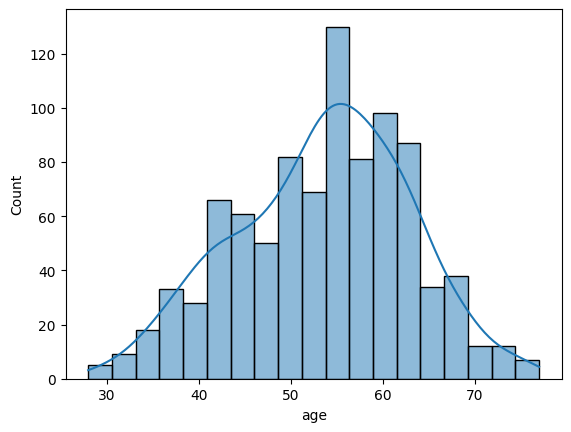

In [20]:
# draw a  histogram to see the distribution of age column 
sns.histplot(df['age'], kde=True)

Mean of age column:  53.51086956521739
Median of age column:  54.0
Mode of age column:  0    54
Name: age, dtype: int64


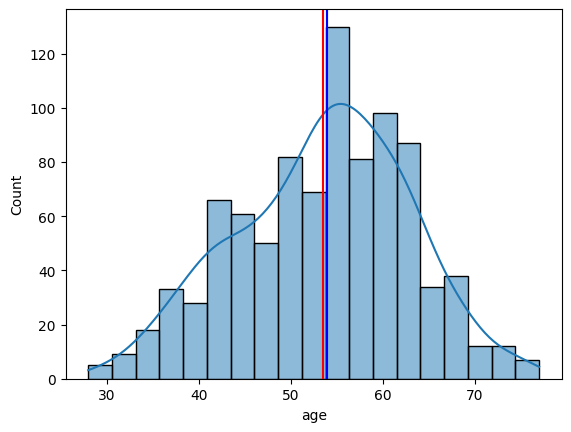

In [21]:
# plot the mean , median  and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean , median and mode of age column
print("Mean of age column: ", df['age'].mean())
print("Median of age column: ", df['age'].median())
print("Mode of age column: ", df['age'].mode())

Let's explore the gender based dstribution of the dataset for age column.

In [22]:
# plot the histogram of age column using plotly and coloring this by sex
fig = px.histogram(df, x="age", color="sex", title="Age Distribution by Sex")
fig.show()

In [23]:
# find the values of sex columns 
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [24]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count=194
total_count = male_count +  female_count

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the percentages
print(f"Male percentage: {male_percentage:.2f}%")
print(f"Female percentage: {female_percentage:.2f}%")


# difference 
male_diff = male_percentage - female_percentage
print(f"Difference: {male_diff:.2f}%")

Male percentage: 78.91%
Female percentage: 21.09%
Difference: 57.83%


In [25]:
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [26]:
# find unique values in count in datset
df['dataset'].value_counts()



dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [27]:
# find the values count of age column grouping by sex
# df['age'].value_counts()
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


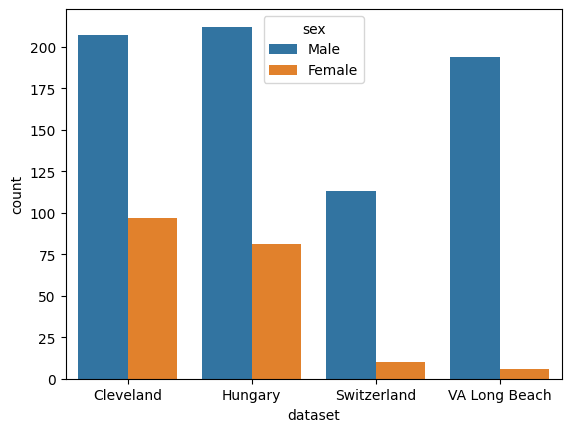

In [28]:
# plot the countplot of dataset column 
sns.countplot(data=df, x='dataset', hue='sex')

# make countplot with plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

#print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

In [29]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(df, x='age', color='dataset')
fig.show()


# print the mean, median and mode of age column groubped by dataset
print(df.groupby('dataset')['age'].describe())

               count       mean       std   min    25%   50%   75%   max
dataset                                                                 
Cleveland      304.0  54.351974  9.150256  28.0  47.75  55.5  61.0  77.0
Hungary        293.0  47.894198  7.738385  29.0  42.00  49.0  54.0  66.0
Switzerland    123.0  55.317073  9.032108  32.0  51.00  56.0  61.5  74.0
VA Long Beach  200.0  59.350000  7.811697  35.0  55.00  60.0  64.0  77.0


## Let's explore cp (chest pain) column:

In [30]:
# value count of cp column 
print(df['cp'].value_counts())


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


In [31]:
# draw the plot of age column grouped by by cp using plotly
fig = px.histogram(df, x='cp', y='age', color='cp')
fig.show()

<Axes: xlabel='sex', ylabel='count'>

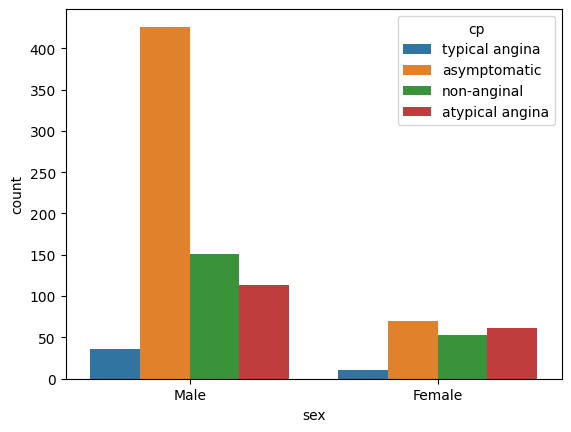

In [32]:
# count plot of cp column by sex column 
sns.countplot(x='sex', hue='cp', data=df)

<Axes: xlabel='sex', ylabel='count'>

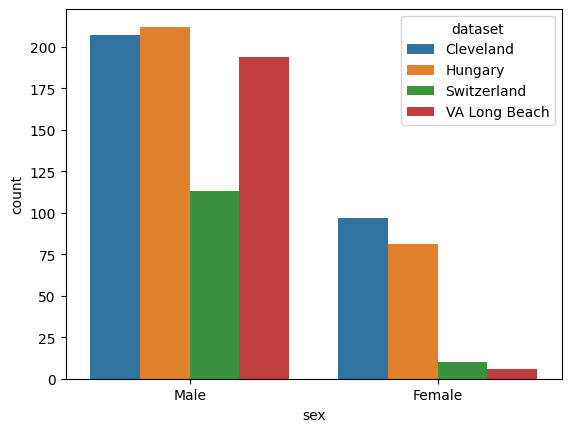

In [33]:
sns.countplot(x='sex', hue='dataset', data=df)

<Axes: xlabel='cp', ylabel='count'>

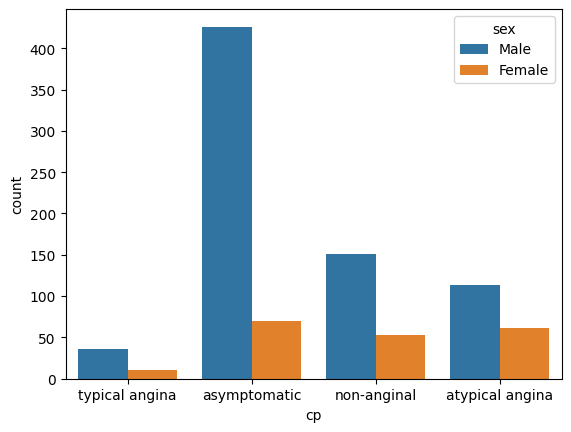

In [34]:
sns.countplot(x='cp', hue='sex', data=df)

#### let's explore the trestbps (resting blood prrssure) column:

The normal resting blood prrssure is 120/80 mg Hg.
`Write ` here , waht will happe  if the blood pressure is high or low and then you can bin the data based on the those values 


In [35]:
# find the valus counts of trestbps column 
print(df['trestbps'].value_counts())
df['trestbps'].describe()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
92.0       1
185.0      1
0.0        1
96.0       1
127.0      1
Name: count, Length: 61, dtype: int64


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

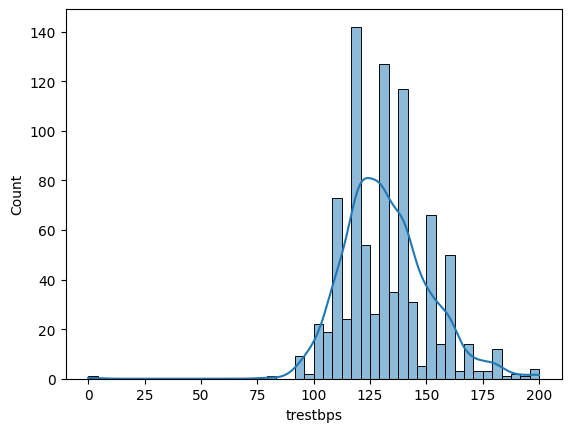

In [36]:
#  crate the hisotgram on tresbps
#  plot the histogram on tresbps
sns.histplot(df['trestbps'], kde=True)
#  plot the histogram on tresbps with a specified number of 

In [37]:
# deal with missong values 
# find the percentage values in tresbps column 
f"Percentage of missong values in trestbps column:{df['trestbps'].isnull().sum()/ len(df) * 100:.2f}%"

'Percentage of missong values in trestbps column:6.41%'

In [38]:
# impute the mussing values of trestbps column using iterative imputer 
# create an object of iteartive imputer 
from sklearn.impute import IterativeImputer
imputer_1 = IterativeImputer(max_iter=10, random_state=0)
# fit the imputer to the data and transform it
X_imputed = imputer_1.fit_transform(df[['trestbps']])

df['trestbps']=imputer_1.transform(df[['trestbps']])

# check the missing values in trestbps column 
print(df['trestbps'].isnull().sum())  

0


In [39]:
# impute the missing values using iterative 
# create the object of imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# fit the imputer to the data on ca , oldpeak, thalch column 
df['ca'] = imputer_2.fit_transform(df[['ca']])
df['oldpeak'] = imputer_2.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_2.fit_transform(df[['thalch']])
df['chol'] = imputer_2.fit_transform(df[['chol']])


## let's impute the missing values in the column by unsing ML models

In [40]:
print(f"The missing values in thal column are {df['thal'].isnull().sum()}")

The missing values in thal column are 486


In [41]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

## Steps:

1. import Libraries
2. Load the data
3. find the columns with missing values and store in an object
4. find the columns based on data type
   1. numeric
   2. Categoricals
   3. Boolean
5. Define the function to impute missing values
6. apply the function to our dataset with missing values
7. check the missing values after imputation

In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


In [43]:
# data loading
df = pd.read_csv('./heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [44]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [45]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [46]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [47]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [49]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

In [50]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.294624277456647 

RMSE = 17.33411416464171 

R2 = 0.06183094840619541 

Missing Values chol : 3.26%
MAE = 45.02348314606742 

RMSE = 63.813869367054565 

R2 = 0.6774115577100583 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.67 accuracy

Missing Values thalch : 5.98%
MAE = 16.575086705202313 

RMSE = 21.544337869139845 

R2 = 0.32507484317189084 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5620697674418604 

RMSE = 0.7878847232998634 

R2 = 0.40859729665758215 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy



In [51]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [52]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


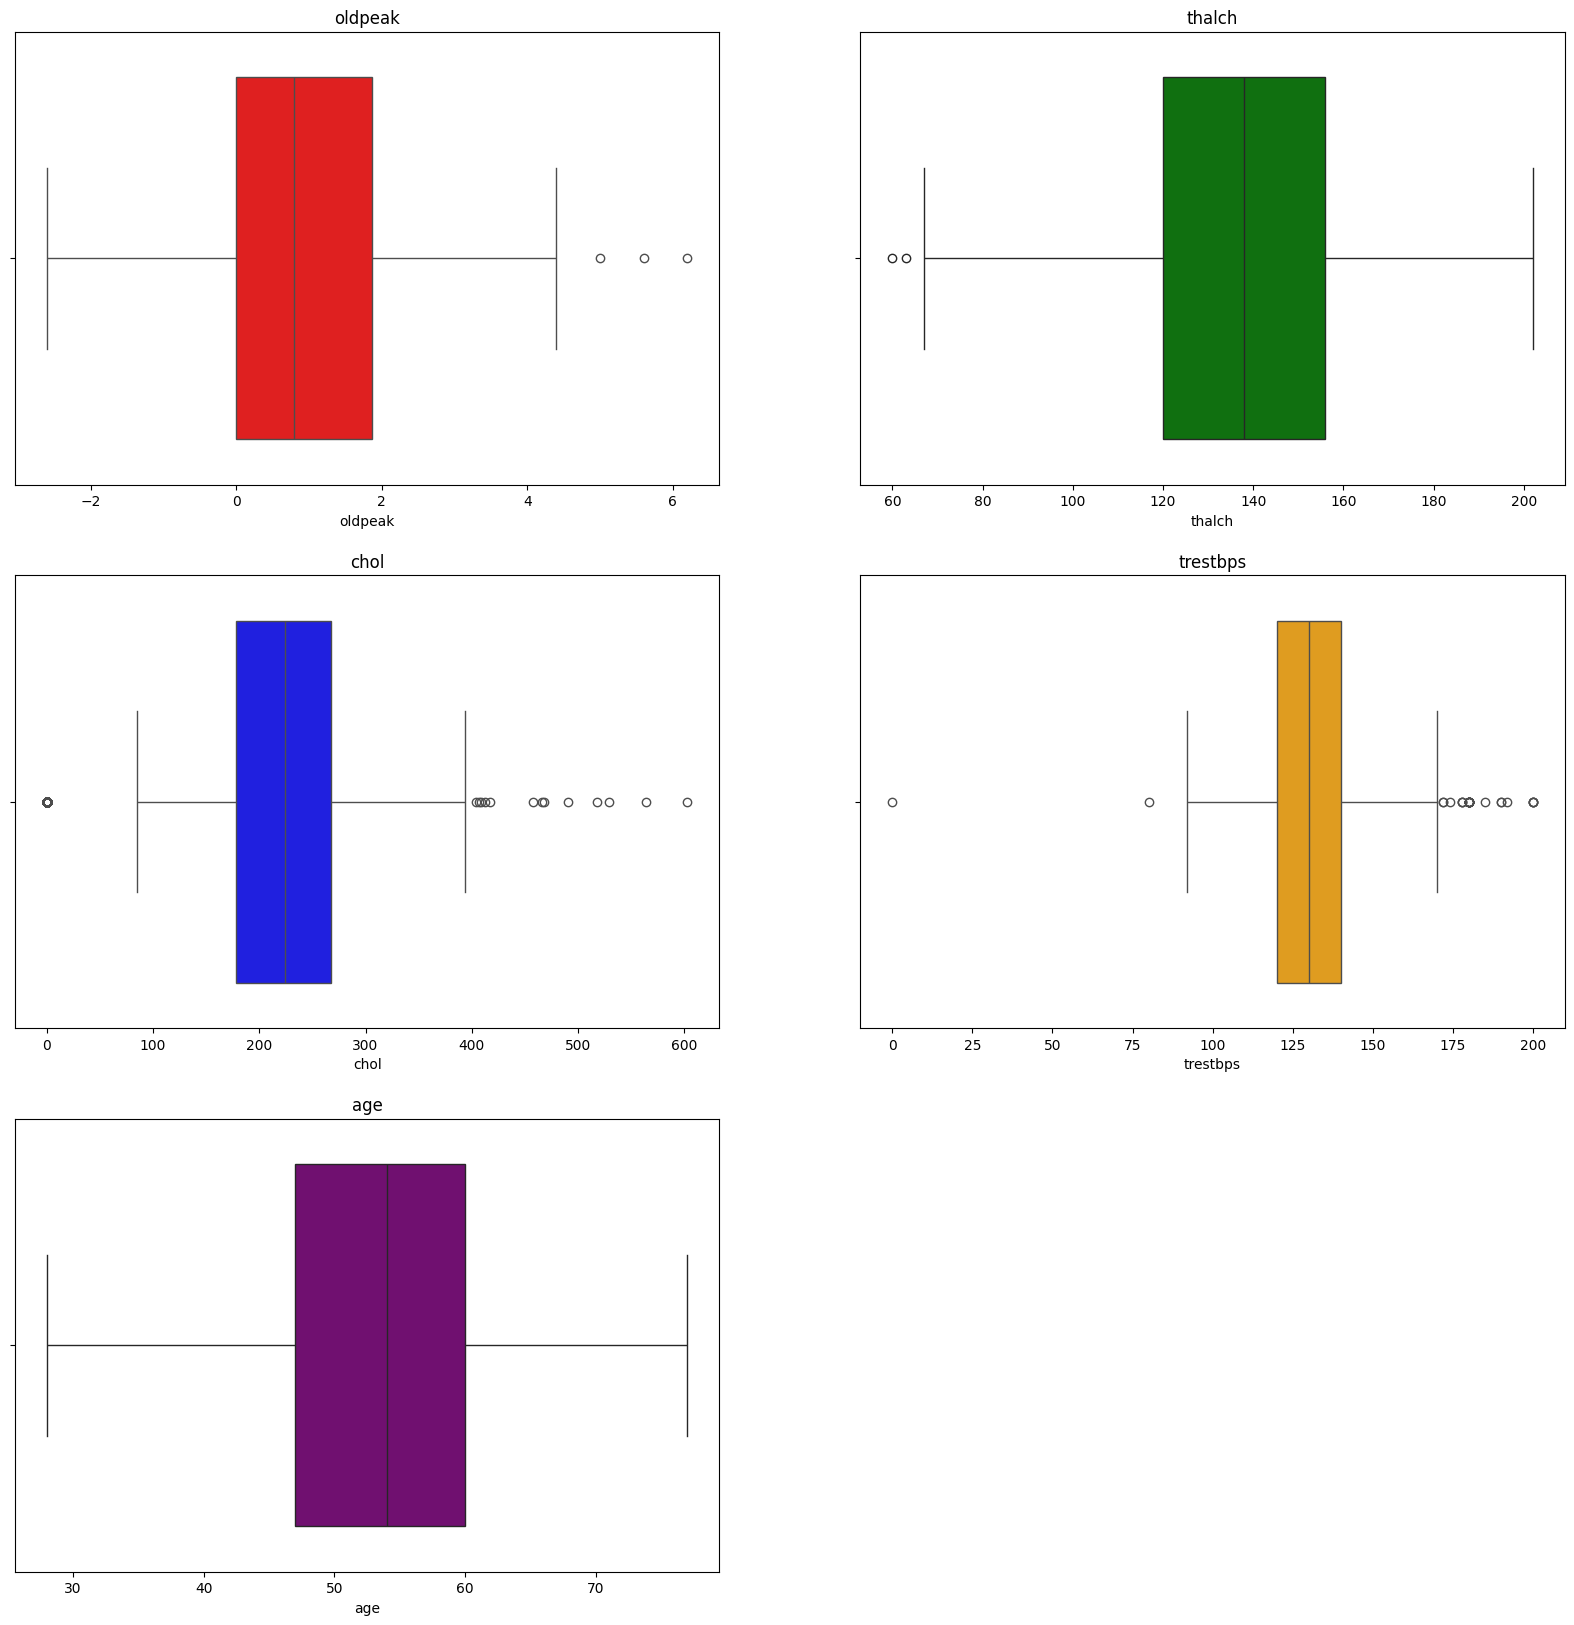

In [55]:
# create the boxplot on different columns
plt.figure(figsize=(20,20))

colors= [ 'red', 'green', 'blue', 'orange', 'purple']

for i , col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)

plt.show()

In [56]:
fig= px.box(df, y=numeric_cols, color_discrete_sequence=colors)
fig.update_layout(title="Box Plots for Numeric Columns", height=800, width=800)
fig.show()

In [58]:
df[df['trestbps']==0]

df= df[df['trestbps'] != 0]


In [61]:
# print the row in df where chol level is 0
print(df.loc[df['chol'] == 0])

# so these are not outliers due to data come from different sources 

      id  age     sex        dataset              cp  trestbps  chol    fbs  \
597  598   32    Male    Switzerland  typical angina     95.00   0.0  False   
598  599   34    Male    Switzerland    asymptomatic    115.00   0.0  False   
599  600   35    Male    Switzerland    asymptomatic    122.58   0.0  False   
600  601   36    Male    Switzerland    asymptomatic    110.00   0.0  False   
601  602   38  Female    Switzerland    asymptomatic    105.00   0.0  False   
..   ...  ...     ...            ...             ...       ...   ...    ...   
818  819   43    Male  VA Long Beach    asymptomatic    122.00   0.0  False   
819  820   63    Male  VA Long Beach     non-anginal    130.00   0.0   True   
822  823   48    Male  VA Long Beach     non-anginal    102.00   0.0  False   
839  840   56    Male  VA Long Beach    asymptomatic    141.21   0.0  False   
840  841   62    Male  VA Long Beach     non-anginal    141.33   0.0   True   

              restecg  thalch  exang  oldpeak      

In [59]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


# Machine Learning

In [64]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [66]:
df['num'].value_counts()
df['num'].describe()

count    919.000000
mean       0.993471
std        1.141398
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

The target column is `num` which is the predicted attribute . We will use this column to predict the heart disease.
The unique values in this column are:[0,1,2,3,4], which states that have are 5 types of heart diseases.

- `0 = no heart disease`
- `1 = mild heart disease`
-  `2 = moderate heart disease`
-  `3 = severe heart disease`
-  `4 = critical heart disease`



In [70]:
# split the data into x and y 
x = df.drop('num', axis=1)
y = df['num']

# encode X data using seperate label encoder for all categorical columns and save 
Label_Encoder = LabelEncoder()
for col in x.columns:
      if  x[col].dtype == 'object' or x[col].dtype == 'category':
            x[col] = Label_Encoder.fit_transform(x[col])
      else:
            pass


# split the data into train and
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Enlist all the models that you will use to predict the heart disease .These models should be classifier for multi-class classification 

1. logistic regression
2.  decision tree classifier
3.  KNN
4.  SVM
5.  NB
6.  Random Forest 
7.  XGBoost
8.  lightGBM


In [89]:

# machine learnig tasks
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# for classification taska
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBRFClassifier,XGBClassifier
# from lightgbm import LGBClassifier
from sklearn.pipeline import Pipeline

# import the Ada and Naive bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

# import the pinelne
from sklearn.linear_model import RidgeClassifierCV, LogisticRegressionCV


#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [90]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbours',KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost',AdaBoostClassifier()),
    ('Naive Bayes', GaussianNB()),
]
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, x_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(x_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 0.653061224489796
Test Accuracy: 0.6304347826086957

Model: Gradient Boosting
Cross-validation Accuracy: 0.6585034013605442
Test Accuracy: 0.657608695652174

Model: XGBoost
Cross-validation Accuracy: 0.6639455782312925
Test Accuracy: 0.6413043478260869

Model: Random Forest
Cross-validation Accuracy: 0.653061224489796
Test Accuracy: 0.6304347826086957

Model: Gradient Boosting
Cross-validation Accuracy: 0.6585034013605442
Test Accuracy: 0.657608695652174

Model: Support Vector Machine
Cross-validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-validation Accuracy: 0.5102040816326531
Test Accuracy: 0.4945652173913043

Model: K-Nearest Neighbours
Cross-validation Accuracy: 0.5823129251700679
Test Accuracy: 0.5978260869565217

Model: Decision Tree
Cross-validation Accuracy: 0.5986394557823129
Test Accuracy: 0.625

Model: Ada Boost
Cross-validation Accuracy: 0.5986394557823129
Test Accuracy

In [91]:
# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl','wb'))

# Outputs:
###     1.The minimum age to have a heart disease starts from 28 years old.
###     2. Most of the people get heart disease at the age of 53-54 years.
###     3. The most of the males and females has disease in ranege of 54 to 55.
###     4. Male percenrage in dataset :78.91%
###     5. Female percentage in dataset :21.09%
###     6.Males are 274.23% more than females in the data 
###     7. we have highest number of people from Cleverland (304) and lowest frmo switzerland (123)
###      - 1.the have highest number of males  from Hungry (212) and lowest frmo switzerland (113)
###      - 2.the have highest number of females  from Hungry (92) and lowest from Cleverland (92)
###     8. `Write down the observation here about mean, median and mode of age column , grouped by dataset column.`
###     9. `Write down the observation from cp column here`
###     10.`Write down the  steps of Imputing missing values and why did you choose those column`
###     11. Explore all other columns to checking their trend 
###     12. `Write down the observation from model output`